In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-09-21 07:06:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-09-21 07:06:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-09-21 07:06:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [15]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [50]:
from sklearn.cluster import KMeans

km = KMeans(init = 'k-means++', n_clusters=3, n_init = 10, max_iter = 300, algorithm='elkan' )
km.fit(fruits_2d)

KMeans(algorithm='elkan', n_clusters=3, n_init=10)

In [51]:
print(km.labels_)

[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [52]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 98, 111,  91]))


In [37]:
import matplotlib.pyplot as plt

In [20]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray')
      axs[i, j].axis('off')
  plt.show(draw_fruits)

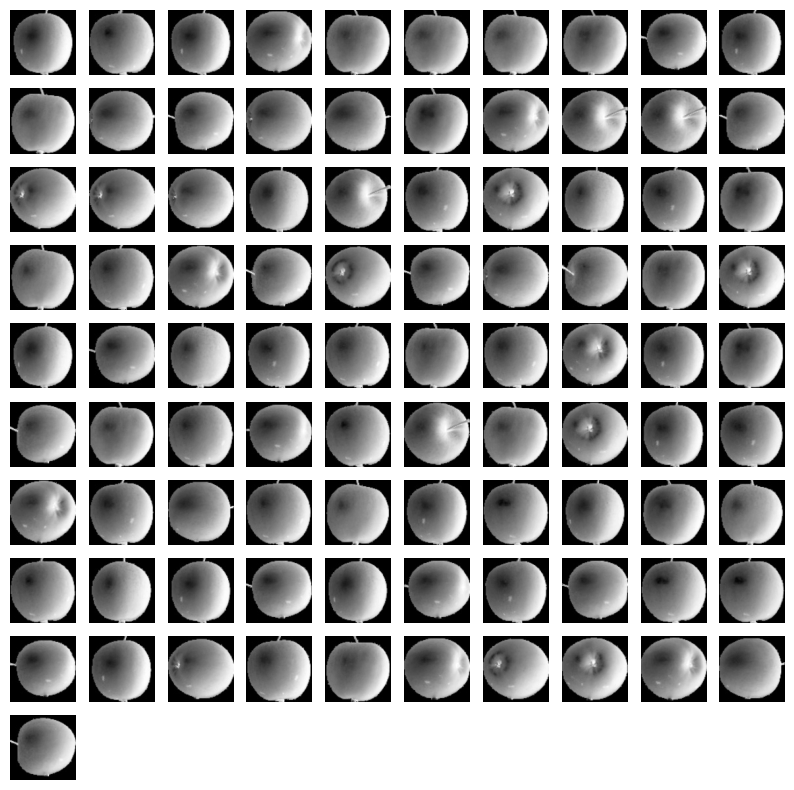

In [21]:
draw_fruits(fruits[km.labels_ ==0])

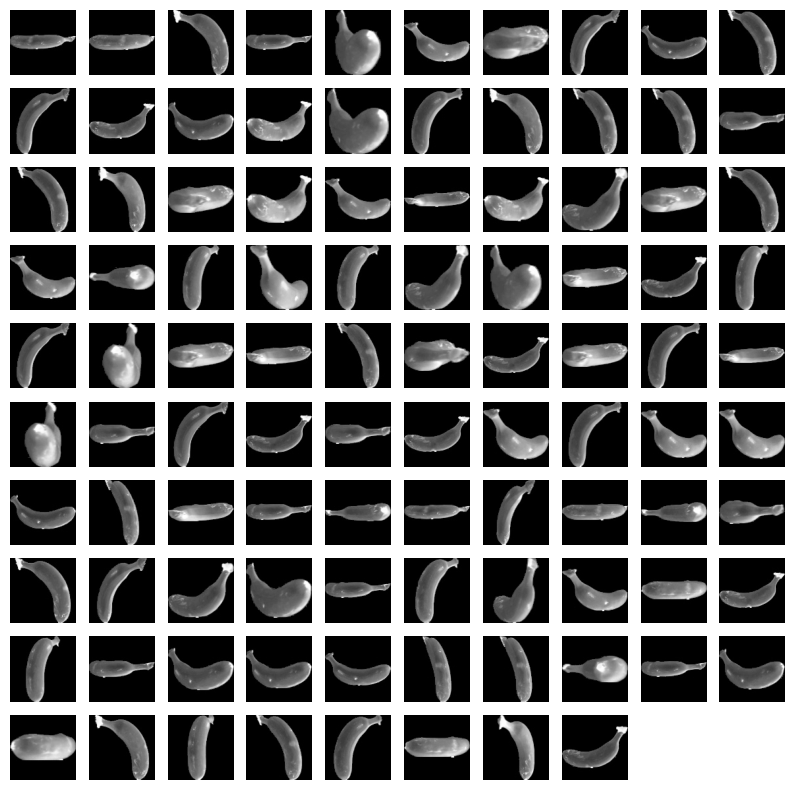

In [22]:
draw_fruits(fruits[km.labels_ ==1])

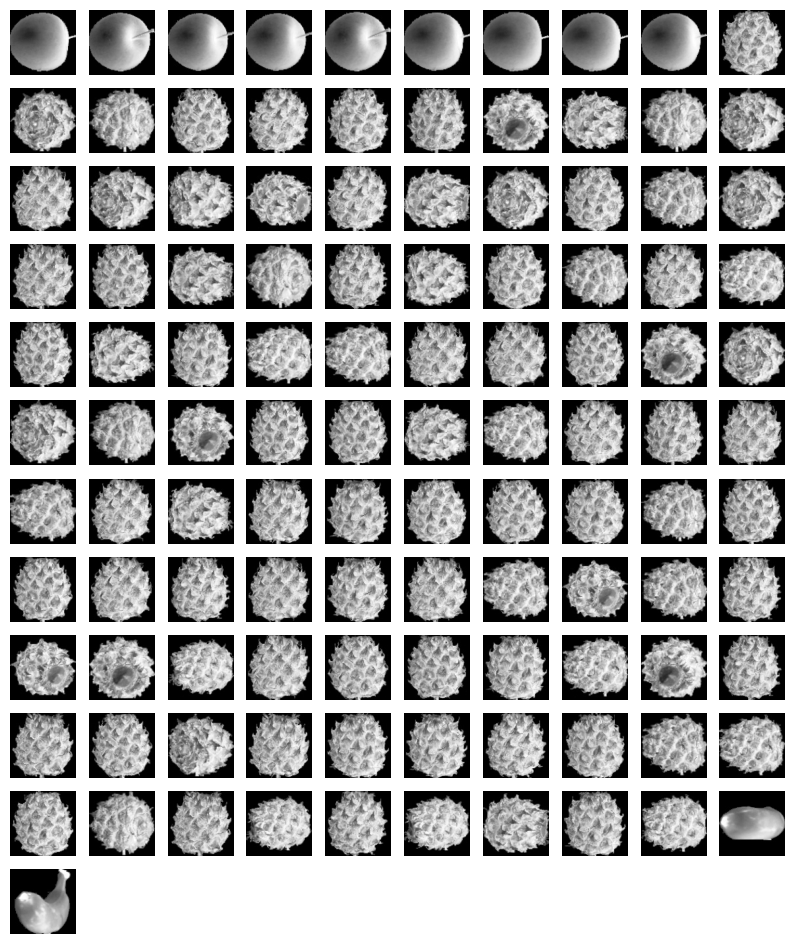

In [23]:
draw_fruits(fruits[km.labels_ ==2])

In [24]:
draw_fruits(fruits[km.labels_ ==3])

ValueError: ignored

<Figure size 0x0 with 0 Axes>

In [ ]:
draw_fruits(fruits[km.labels_ ==4])

In [ ]:
draw_fruits(fruits[km.labels_ ==5])

In [ ]:
draw_fruits(fruits[km.labels_ ==6])

In [ ]:
draw_fruits(fruits[km.labels_ ==0])
draw_fruits(fruits[km.labels_ ==6])

In [ ]:
draw_fruits(fruits[km.labels_ ==0])
draw_fruits(fruits[km.labels_ ==6])

In [ ]:
print(km.labels_)

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101]))

In [ ]:
print(km.predict(fruits_2d[100:101]))

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_)

In [ ]:
inertia = []
for k in range(2,10):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

In [ ]:
plt.plot(range(2,10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()